In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from natsort import natsorted

In [15]:
base_dir = './nahui'

In [19]:
def gen_wfn_file():
    wfn_dict = {}

    for v_folder in natsorted(os.listdir(base_dir)):
        v_path = os.path.join(base_dir, v_folder)

        for b_folder in natsorted(os.listdir(v_path)):
            if b_folder[0] == 'b':
                b_path = os.path.join(v_path, b_folder)
                
            # if os.path.isdir(b_path):
            #     # print(f"{v_folder}/{b_folder}")
                    
                files = os.listdir(b_path)
                for file in files:
                    if file == 'fort.1000':
                        file_path = os.path.join(b_path, file)

                        with open(file_path, 'r') as file:
                            lines = file.readlines()

                            x_vals = []
                            y_vals = []

                            for line in lines:
                              columns = line.split()
                              x_vals.append(float(columns[0]))
                              y_vals.append(float(columns[1]))
                            
                            x_vals_to_int = []
                            y_vals_to_int = []
                
                            for i, x in enumerate(x_vals):
                                if x <= -15:
                                    x_vals_to_int.append(x)
                                    y_vals_to_int.append(y_vals[i])
                    
                            if v_folder in wfn_dict:
                                wfn_dict[v_folder][b_folder] = (x_vals_to_int, y_vals_to_int)
                            else:
                                wfn_dict[v_folder] = {}
                                wfn_dict[v_folder][b_folder] = (x_vals_to_int, y_vals_to_int)
    return wfn_dict

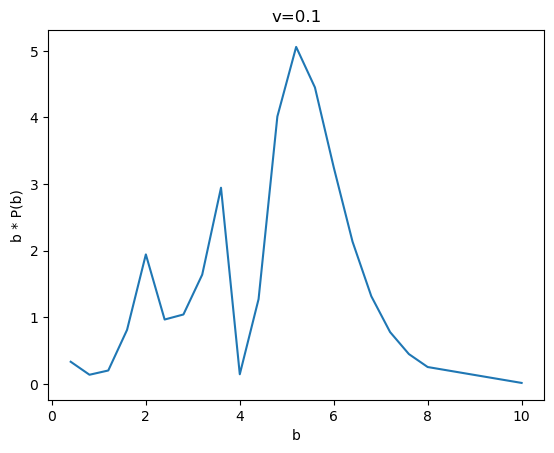

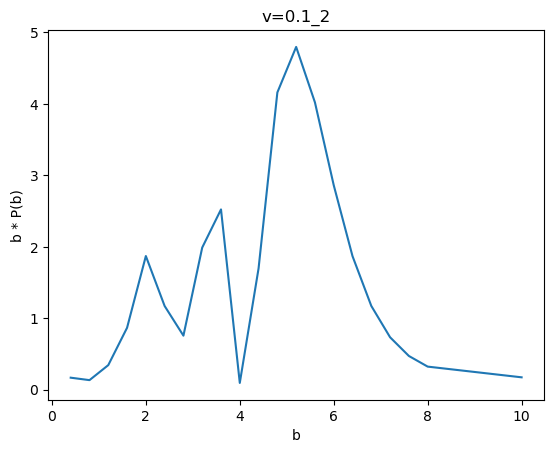

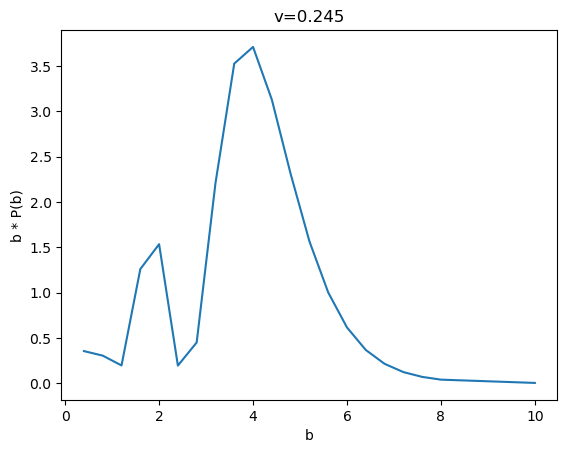

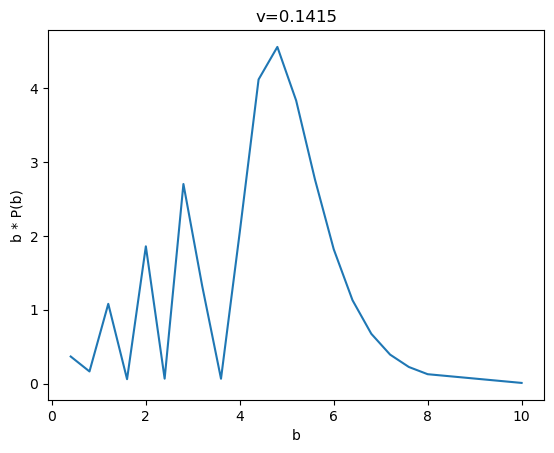

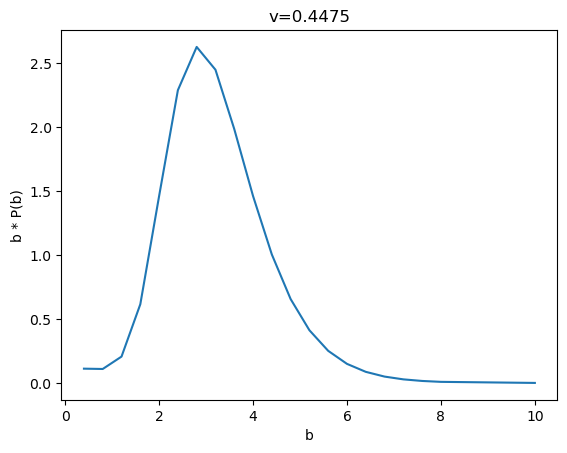

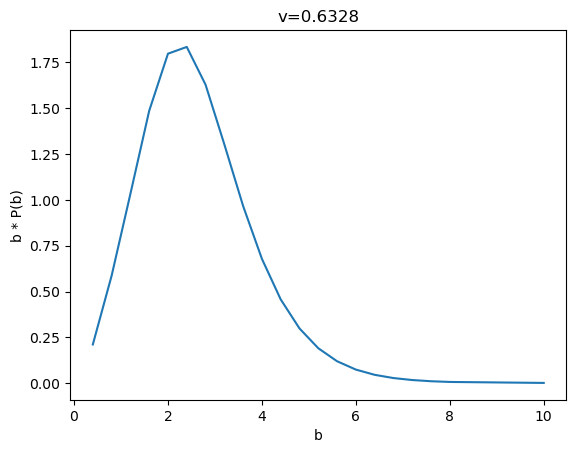

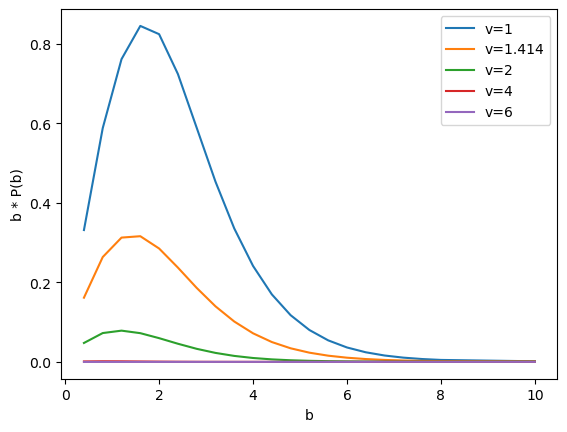

In [67]:
wfn_dict = gen_wfn_file()
cross_sections_dict = {}
b_set = set()

for v in wfn_dict:
    cross_sections_list = []
    for b in wfn_dict[v]:
        x_vals, y_vals = wfn_dict[v][b]
        cross_section = trapz(y_vals, x_vals)
        cross_sections_list.append((cross_section))

        b_parts = b.split('=')
        b = float(b_parts[1])
        b_set.add(b)
    
    cross_sections_dict[v] = cross_sections_list
    
bs = sorted(b_set)

for key in cross_sections_dict:
    num = float(key[2]) 
    if num < 1:
        plt.plot(bs, np.array(bs)*cross_sections_dict[key])
        plt.xlabel('b')
        plt.ylabel('b * P(b)')
        plt.title(f'{key}')
        plt.show()
    else:
        plt.plot(bs, np.array(bs)*cross_sections_dict[key], label=f'{key}')
plt.xlabel('b')
plt.ylabel('b * P(b)')
plt.legend()
plt.show()
